In [9]:
import pandas as pd
from pathlib import Path
import yfinance as yf
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [3]:
#Read Data#

dax = yf.Ticker("^GDAXI")
dax_df = dax.history(period='max')
dax_df = dax_df[['Close']].rename(columns = {'Close': 'DAX'})

jkse = yf.Ticker("^JKSE")
jkse_df = jkse.history(period='max')
jkse_df = jkse_df[['Close']].rename(columns = {'Close': 'JKSE'})

ftse = yf.Ticker("^FTLC")
ftse_df = ftse.history(period='max')
ftse_df = ftse_df[['Close']].rename(columns = {'Close': 'FTSE'})

szse = yf.Ticker("399001.SZ")
szse_df = szse.history(period='max')
szse_df = szse_df[['Close']].rename(columns = {'Close': 'SZSE'})

merv = yf.Ticker("^MERV")
merv_df = merv.history(period='max')
merv_df = merv_df[['Close']].rename(columns = {'Close': 'MERV'})

bvsp = yf.Ticker("^BVSP")
bvsp_df = bvsp.history(period='max')
bvsp_df = bvsp_df[['Close']].rename(columns = {'Close': 'BVSP'})

hsi = yf.Ticker("^HSI")
hsi_df = hsi.history(period='max')
hsi_df = hsi_df[['Close']].rename(columns = {'Close': 'HSI'})

euro = yf.Ticker("^N100")
euro_df = euro.history(period='max')
euro_df = euro_df[['Close']].rename(columns = {'Close': 'EURO'})

tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = tsx_df[['Close']].rename(columns = {'Close': 'TSX'})

bse = yf.Ticker("^BSESN")
bse_df = bse.history(period='max')
bse_df = bse_df[['Close']].rename(columns = {'Close': 'BSE'})

mxx = yf.Ticker("^MXX")
mxx_df = mxx.history(period='max')
mxx_df = mxx_df[['Close']].rename(columns = {'Close': 'MXX'})

ta = yf.Ticker("^TA125.TA")
ta_df = ta.history(period='max')
ta_df = ta_df[['Close']].rename(columns = {'Close': 'TA'})

sp500 = yf.Ticker("^GSPC")
sp500_df = sp500.history(period='max')
sp500_df = sp500_df[['Close']].rename(columns = {'Close': 'S&P 500'})

nikkei = yf.Ticker("^N225")
nikkei_df = nikkei.history(period='max')
nikkei_df = nikkei_df[['Close']].rename(columns = {'Close': 'NIKKEI'})



In [4]:
#Concat all tickers and format for later#

ticker_list = [dax_df, jkse_df, ftse_df, szse_df, merv_df, bvsp_df, hsi_df, euro_df, tsx_df, bse_df, mxx_df, ta_df, sp500_df, nikkei_df]
euro_ticker_list = [dax_df, ftse_df, euro_df]
asia_ticker_list = [jkse_df, szse_df, hsi_df, bse_df, ta_df, nikkei_df]
americas_ticker_list = [merv_df, bvsp_df, tsx_df, mxx_df, sp500_df]

all_tickers_df = pd.concat(ticker_list, axis=1, join='inner')
all_tickers_df = pd.concat(ticker_list, axis=1, join='inner')
all_tickers_df = all_tickers_df.reset_index()
all_tickers_df['Year'] = all_tickers_df['Date'].dt.year
all_tickers_df = all_tickers_df.drop(['Date'], axis=1).set_index('Year')
ticker_returns_df = all_tickers_df.pct_change()
ticker_returns_df = (1 + ticker_returns_df).cumprod() - 1
ticker_returns_df = ticker_returns_df.groupby('Year').tail(1)
ticker_returns_df.head()

,DAX,JKSE,FTSE,SZSE,MERV,BVSP,HSI,EURO,TSX,BSE,MXX,TA,S&P 500,NIKKEI
Year,,,,,,,,,,,,,,
2000,-0.058637,-0.407180,-0.070783,0.356271,-0.204429,-0.084916,-0.141365,0.015157,0.048412,-0.265303,-0.199686,0.004225,-0.089008,-0.293622
2001,-0.250922,-0.460414,-0.219402,-0.051300,-0.387231,-0.185036,-0.320491,-0.199933,-0.091142,-0.404182,-0.061717,-0.187096,-0.185427,-0.450897
2002,-0.550413,-0.399721,-0.412081,-0.180472,-0.051399,-0.292915,-0.440171,-0.436468,-0.203058,-0.392851,-0.083114,-0.284777,-0.368131,-0.558615
2003,-0.398028,-0.011886,-0.302147,0.003614,1.054802,0.402814,-0.266276,-0.366622,0.001365,0.054788,0.314019,0.085232,-0.207072,-0.438156
2004,-0.353862,0.428459,-0.236926,-0.109987,1.647590,0.652640,-0.170404,-0.311830,0.129447,0.187858,0.942804,0.304219,-0.132819,-0.395419


In [5]:
#Read and Format gdp#

gdppath = Path("../Data/GDP.csv")
gdp_df = pd.read_csv(gdppath)
gdp_df = gdp_df.rename(columns = {"Country Name": "Year"}).set_index("Year").T
gdp_df = gdp_df.dropna()
gdp_df = gdp_df.div(100)
gdp_df = (1 + gdp_df).cumprod() - 1
gdp_df.index = gdp_df.index.astype('int64')
gdp_df.head()

Year,Canada,India,Israel,Mexico,Argentina,Brazil,"Hong Kong SAR, China",European Union,Germany,United Kingdom,Indonesia,China,Japan,United States,Russian Federation,United Arab Emirates
1990,0.001647,0.055335,0.073152,0.051758,-0.024672,-0.031024,0.038306,0.033702,0.052550,0.007338,0.072421,0.039071,0.048927,0.018860,-0.030000,0.183280
1991,-0.019248,0.066488,0.156065,0.096087,0.064406,-0.016373,0.097509,0.052406,0.106317,-0.003775,0.146547,0.135643,0.084774,0.017757,-0.078955,0.193457
1992,-0.010419,0.124957,0.245767,0.134900,0.148891,-0.020966,0.165938,0.064482,0.127648,0.000221,0.221044,0.297088,0.093974,0.053606,-0.212793,0.233378
1993,0.015912,0.178401,0.297052,0.156930,0.243180,0.024708,0.238240,0.058460,0.116604,0.025125,0.300368,0.476963,0.088308,0.082611,-0.281032,0.248933
1994,0.061572,0.256870,0.393395,0.214095,0.315734,0.079371,0.312980,0.086548,0.143381,0.064551,0.398415,0.669738,0.099116,0.126227,-0.371405,0.335061


In [6]:
#Aggregate Data together#

agg_df = pd.concat([ticker_returns_df, gdp_df], join = 'inner', axis = 1)
agg_df

,DAX,JKSE,FTSE,SZSE,MERV,BVSP,HSI,EURO,TSX,BSE,...,"Hong Kong SAR, China",European Union,Germany,United Kingdom,Indonesia,China,Japan,United States,Russian Federation,United Arab Emirates
2000,-0.058637,-0.407180,-0.070783,0.356271,-0.204429,-0.084916,-0.141365,0.015157,0.048412,-0.265303,...,0.529854,0.286030,0.274239,0.288261,0.569455,1.802064,0.192839,0.428503,-0.348233,0.865183
2001,-0.250922,-0.460414,-0.219402,-0.051300,-0.387231,-0.185036,-0.320491,-0.199933,-0.091142,-0.404182,...,0.538434,0.314180,0.295872,0.326579,0.626638,2.035754,0.197686,0.442764,-0.314993,0.891278
2002,-0.550413,-0.399721,-0.412081,-0.180472,-0.051399,-0.292915,-0.440171,-0.436468,-0.203058,-0.392851,...,0.563921,0.328939,0.293300,0.357413,0.699828,2.312938,0.199099,0.467892,-0.282797,0.937301
2003,-0.398028,-0.011886,-0.302147,0.003614,1.054802,0.402814,-0.266276,-0.366622,0.001365,0.054788,...,0.611719,0.341270,0.284072,0.402023,0.781086,2.645411,0.217424,0.509892,-0.230442,1.107794
2004,-0.353862,0.428459,-0.236926,-0.109987,1.647590,0.652640,-0.170404,-0.311830,0.129447,0.187858,...,0.751939,0.376186,0.299351,0.435306,0.870690,3.014007,0.244264,0.567251,-0.175034,1.309435
2005,-0.171304,0.660390,-0.096852,-0.176460,1.951049,1.110655,-0.118740,-0.143938,0.377161,0.697912,...,0.881375,0.402752,0.308731,0.480945,0.977181,3.471434,0.264952,0.622312,-0.122237,1.421562
2006,0.003774,1.578515,0.019855,0.840486,2.997285,1.805754,0.171564,0.006266,0.573830,1.521638,...,1.013685,0.451784,0.358654,0.522239,1.085944,4.040177,0.282915,0.668629,-0.050259,1.659778
2007,0.220383,2.912644,0.047882,4.089195,3.145993,3.023342,0.630834,0.043192,0.667227,2.681786,...,1.143864,0.497574,0.399197,0.559238,1.218298,4.757464,0.304137,0.699935,0.030468,1.744476
2008,-0.295726,0.921270,-0.323121,1.086072,0.999274,1.373289,-0.143528,-0.441185,0.005718,0.808110,...,1.189484,0.507246,0.412661,0.554854,1.351700,5.313306,0.289875,0.697613,0.084052,1.832075
2009,-0.097353,2.524098,-0.136407,2.616612,3.285313,3.253233,0.235416,-0.291829,0.417599,2.039878,...,1.135643,0.441985,0.332179,0.488806,1.460557,5.906745,0.220010,0.654549,-0.000504,1.683592


In [16]:
correlation = ticker_returns_df.corr()
correlation

,DAX,JKSE,FTSE,SZSE,MERV,BVSP,HSI,EURO,TSX,BSE,MXX,TA,S&P 500,NIKKEI
DAX,1.000000,0.910423,0.924328,0.609881,0.828439,0.792387,0.859880,0.789358,0.918712,0.939587,0.822669,0.899668,0.937117,0.896570
JKSE,0.910423,1.000000,0.865568,0.616863,0.733027,0.840505,0.875487,0.535903,0.909695,0.946129,0.945186,0.935054,0.826760,0.709436
FTSE,0.924328,0.865568,1.000000,0.559080,0.622962,0.722445,0.882980,0.824396,0.920552,0.833433,0.821580,0.886817,0.790743,0.828459
SZSE,0.609881,0.616863,0.559080,1.000000,0.378469,0.672785,0.801503,0.419581,0.696551,0.656501,0.706034,0.747663,0.453953,0.386535
MERV,0.828439,0.733027,0.622962,0.378469,1.000000,0.801475,0.625532,0.626571,0.725581,0.874132,0.549199,0.691691,0.954767,0.825381
BVSP,0.792387,0.840505,0.722445,0.672785,0.801475,1.000000,0.862274,0.540844,0.876526,0.921256,0.794078,0.889248,0.795731,0.652077
HSI,0.859880,0.875487,0.882980,0.801503,0.625532,0.862274,1.000000,0.677051,0.930950,0.885676,0.876075,0.934689,0.733369,0.705190
EURO,0.789358,0.535903,0.824396,0.419581,0.626571,0.540844,0.677051,1.000000,0.716269,0.648774,0.423822,0.632213,0.751682,0.885032
TSX,0.918712,0.909695,0.920552,0.696551,0.725581,0.876526,0.930950,0.716269,1.000000,0.929973,0.893090,0.973667,0.841221,0.814197
BSE,0.939587,0.946129,0.833433,0.656501,0.874132,0.921256,0.885676,0.648774,0.929973,1.000000,0.858672,0.941433,0.925388,0.820935


<AxesSubplot:>

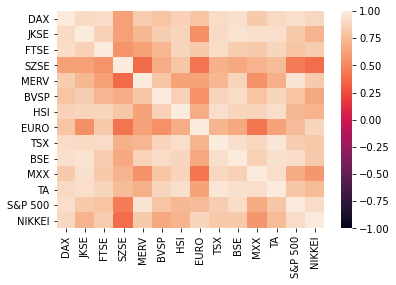

In [17]:
sns.heatmap(correlation, vmin=-1, vmax=1)